In [1]:
import pandas as pd
from module import replacer
import warnings
warnings.filterwarnings('ignore')

# Import Dataset

In [2]:
a=pd.read_csv('C:/Users/Lenovo/Downloads/Mall_Customers.csv')
a.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
a.shape

(200, 5)

# Remove unnecessary columns

In [4]:
a = a.drop(labels=['CustomerID'],axis=1)
a = a.rename(columns= {'Genre': 'Gender'})

In [5]:
a.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [6]:
# Check for null values
a.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
a.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


# Visual Graphs

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Gender')

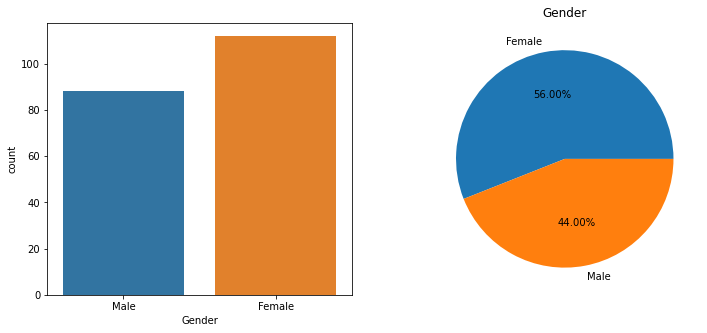

In [9]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(a['Gender'])
plt.subplot(1,2,2)
plt.pie(a['Gender'].value_counts(), labels = a['Gender'].value_counts().index, autopct='%.02f%%')
plt.title('Gender')

In [10]:
a['AGE'] = pd.cut(a['Age'], [18,30,45,60,70])
a['ANNUAL_INCOME'] = pd.cut(a['Annual Income (k$)'], [15,30,50,70,90,110,130,150])
a['SPENDING_SCORE'] = pd.cut(a['Spending Score (1-100)'], [0,20,40,60,80,100])

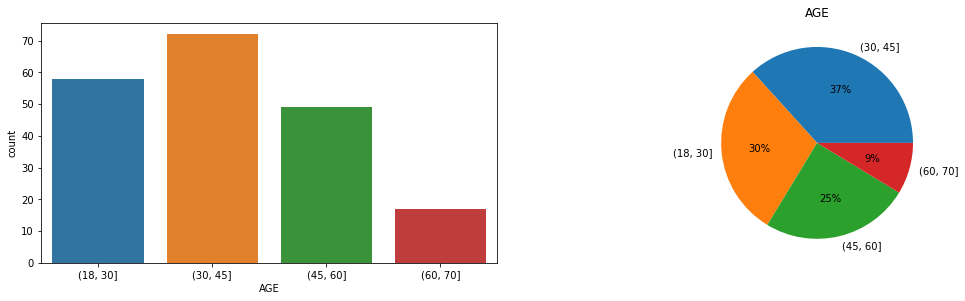

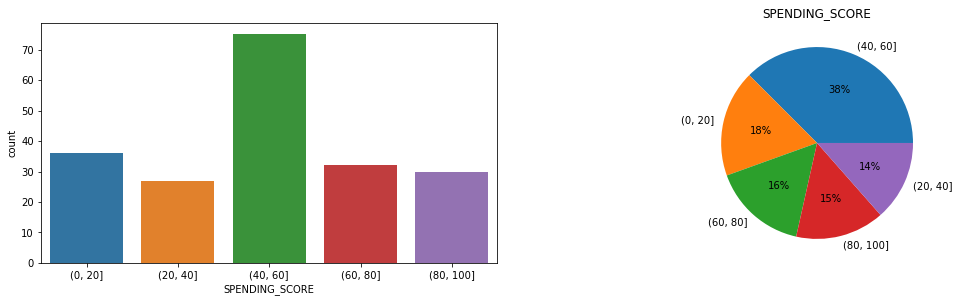

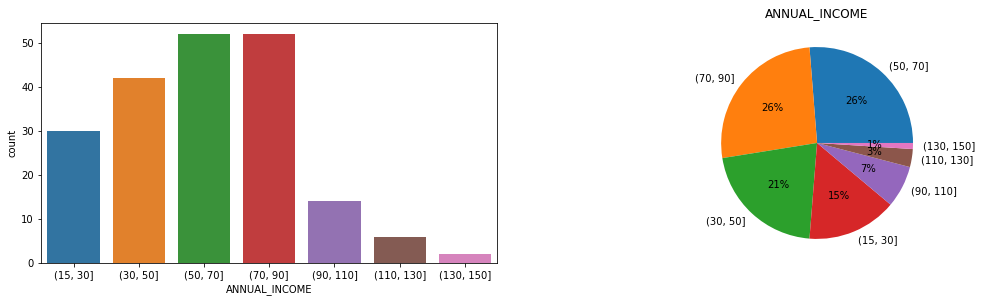

In [11]:
n = 1
for i in ['AGE', 'SPENDING_SCORE', 'ANNUAL_INCOME']:
    plt.figure(figsize=(18,15))
    plt.subplot(3,2,n)
    sns.countplot(a[i])
    plt.subplot(3,2,n+1)
    plt.pie(a[i].value_counts(), labels = a[i].value_counts().index, autopct='%.0f%%')
    plt.title(i)
    
    



In [12]:
a = a.drop(labels=['AGE','SPENDING_SCORE','ANNUAL_INCOME'],axis=1)

In [13]:
x1 = a[['Age','Annual Income (k$)', 'Spending Score (1-100)']]
x1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


# 1. 'Annual Income' and 'Spending Score'

In [14]:
a1 = a[['Annual Income (k$)','Spending Score (1-100)']]
a1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


# KMeans Clustering

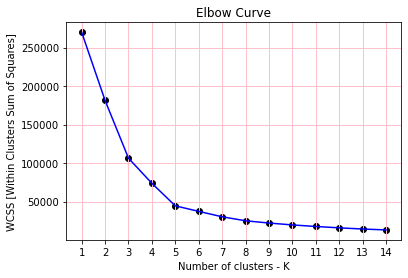

In [15]:
from sklearn.cluster import KMeans
n = list(range(1,15,1))
wcss = []

for i in range(1,15,1):
    km  = KMeans(n_clusters=i,random_state=25)
    model = km.fit(a1)
    wcss.append(model.inertia_)

plt.scatter(n,wcss, c='black')
plt.plot(n,wcss, c='blue')
plt.xlabel("Number of clusters - K")
plt.ylabel("WCSS [Within Clusters Sum of Squares]")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))
plt.grid(axis='both',color='pink', linestyle='-', linewidth=1)    

In [16]:
km = KMeans(n_clusters= 5,random_state=25)
a1['cluster'] = km.fit_predict(a1)
a1.head()

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,2
1,15,81,1
2,16,6,2
3,16,77,1
4,17,40,2


# Centroid

In [17]:
centroid = km.cluster_centers_
centroid

array([[55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

# Plot

Text(0, 0.5, 'Spending Score')

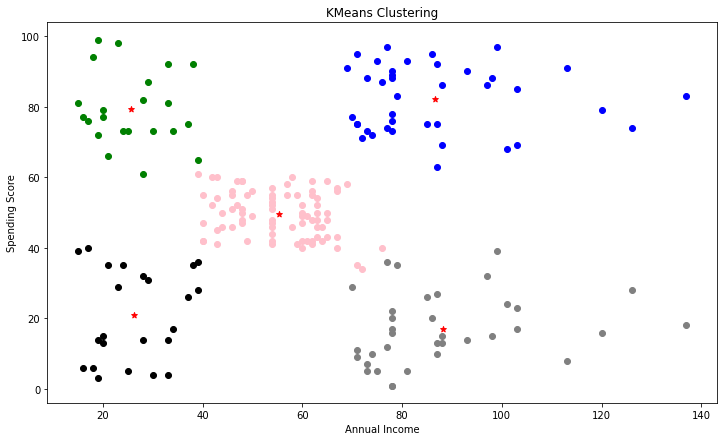

In [18]:
plt.figure(figsize=(12,7))
p0 = a1[a1.cluster == 0]
p1 = a1[a1.cluster == 1]
p2 = a1[a1.cluster == 2]
p3 = a1[a1.cluster == 3]
p4 = a1[a1.cluster == 4]

plt.scatter(p0[['Annual Income (k$)']], p0[['Spending Score (1-100)']], c = 'pink')
plt.scatter(p1[['Annual Income (k$)']], p1[['Spending Score (1-100)']], c = 'green')
plt.scatter(p2[['Annual Income (k$)']], p2[['Spending Score (1-100)']], c = 'black')
plt.scatter(p3[['Annual Income (k$)']], p3[['Spending Score (1-100)']], c = 'blue')
plt.scatter(p4[['Annual Income (k$)']], p4[['Spending Score (1-100)']], c = 'grey')

plt.scatter(centroid[:,0], centroid[:,1], c='red', marker='*')
plt.title('KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')

# 2: 'Age' and 'Spending Score'

In [19]:
a2 = a[['Age', 'Spending Score (1-100)']]
a2.head()

,Age,Spending Score (1-100)
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40


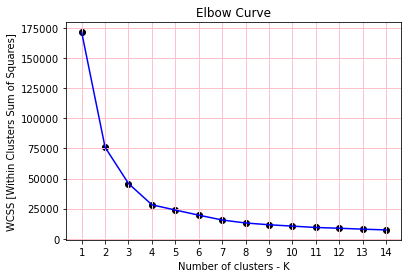

In [20]:
n = list(range(1,15,1))
wcss = []

for i in range(1,15,1):
    km = KMeans(n_clusters= i,random_state=25)
    model = km.fit(a2)
    wcss.append(model.inertia_)
    
plt.scatter(n,wcss, c='black')
plt.plot(n,wcss, c='blue')
plt.xlabel("Number of clusters - K")
plt.ylabel("WCSS [Within Clusters Sum of Squares]")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))
plt.grid(axis='both',color='pink', linestyle='-', linewidth=1)    

In [21]:
km2 = KMeans(n_clusters= 4, random_state= 25)
a2['cluster'] = km2.fit_predict(a2)
a2.head()

,Age,Spending Score (1-100),cluster
0,19,39,0
1,21,81,1
2,20,6,3
3,23,77,1
4,31,40,0


In [22]:
centroid2 = km2.cluster_centers_
centroid2

array([[27.61702128, 49.14893617],
       [30.1754386 , 82.35087719],
       [55.70833333, 48.22916667],
       [43.29166667, 15.02083333]])

# Plot 

Text(0, 0.5, 'Spending Score')

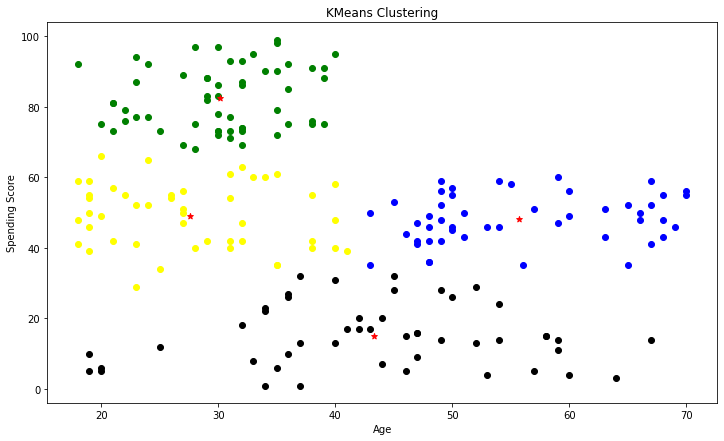

In [23]:
plt.figure(figsize=(12,7))
p0 = a2[a2.cluster == 0]
p1 = a2[a2.cluster == 1]
p2 = a2[a2.cluster == 2]
p3 = a2[a2.cluster == 3]

plt.scatter(p0[['Age']], p0[['Spending Score (1-100)']], c = 'yellow')
plt.scatter(p1[['Age']], p1[['Spending Score (1-100)']], c = 'green')
plt.scatter(p2[['Age']], p2[['Spending Score (1-100)']], c = 'blue')
plt.scatter(p3[['Age']], p3[['Spending Score (1-100)']], c = 'black')

plt.scatter(centroid2[:,0], centroid2[:,1], c='red', marker='*')

plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score')

# 3: 'Age' and 'Annual Income'

In [32]:
a3 = a[['Age','Annual Income (k$)']]
a3.head()

,Age,Annual Income (k$)
0,19,15
1,21,15
2,20,16
3,23,16
4,31,17


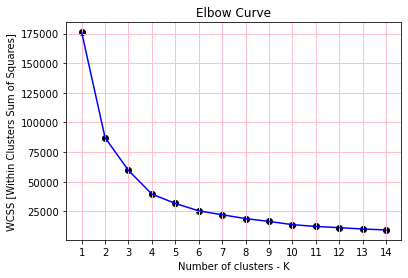

In [33]:
n = list(range(1,15,1))
wcss = []

for i in range(1,15,1):
    km = KMeans(n_clusters= i,random_state=25)
    model = km.fit(a3)
    wcss.append(model.inertia_)
    
plt.scatter(n,wcss, c='black')
plt.plot(n,wcss, c='blue')
plt.xlabel("Number of clusters - K")
plt.ylabel("WCSS [Within Clusters Sum of Squares]")
plt.title("Elbow Curve")
plt.xticks(range(1,15,1))
plt.grid(axis='both',color='pink', linestyle='-', linewidth=1)  

In [34]:
km3 = KMeans(n_clusters= 5, random_state= 25)
a3['cluster'] = km3.fit_predict(a3)
a3.head()

,Age,Annual Income (k$),cluster
0,19,15,2
1,21,15,2
2,20,16,2
3,23,16,2
4,31,17,2


Text(0, 0.5, 'Annual Income (k$)')

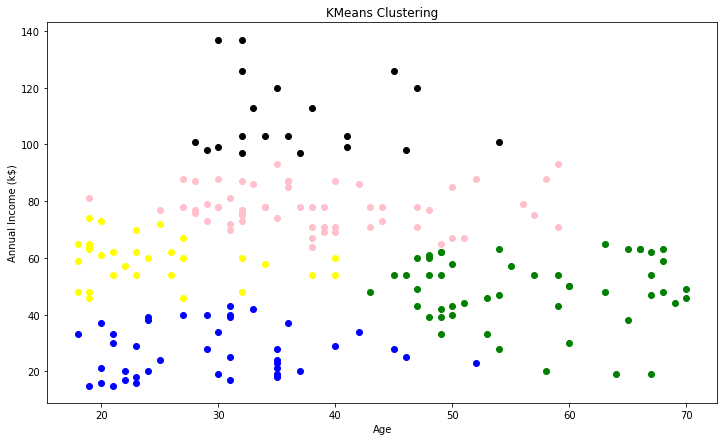

In [35]:
plt.figure(figsize=(12,7))
p0 = a3[a3.cluster == 0]
p1 = a3[a3.cluster == 1]
p2 = a3[a3.cluster == 2]
p3 = a3[a3.cluster == 3]
p4 = a3[a3.cluster == 4]

plt.scatter(p0[['Age']], p0[['Annual Income (k$)']], c = 'yellow')
plt.scatter(p1[['Age']], p1[['Annual Income (k$)']], c = 'green')
plt.scatter(p2[['Age']], p2[['Annual Income (k$)']], c = 'blue')
plt.scatter(p3[['Age']], p3[['Annual Income (k$)']], c = 'black')
plt.scatter(p4[['Age']], p4[['Annual Income (k$)']], c = 'pink')

plt.title('KMeans Clustering')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')